In [28]:
#Import the library
import pandas as pd


In [29]:
walmart=pd.read_csv("C:/Data Set/Walmart_Footfalls_Raw.csv")

In [30]:
walmart

,Month,Footfalls
0,Jan-91,1709
1,Feb-91,1621
2,Mar-91,1973
3,Apr-91,1812
4,May-91,1975
...,...,...
154,Nov-03,2076
155,Dec-03,2141
156,Jan-04,1832
157,Feb-04,1838


In [31]:
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#in this wal mart data we have Jan-1991 in 0th column,we need only first
#example-Jan from each cell

In [32]:
p=walmart["Month"][0]
p[0:3]

'Jan'

In [33]:
#before we will extract,let us create new column callled months to stop
walmart['months']=0


In [34]:
#you can check the dataframe with months name with all values 0
#the total records are 159 in walmart
for i in range(159):
    p=walmart["Month"][i]
    walmart["months"][i]=p[0:3]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5532\709073741.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmart["months"][i]=p[0:3]


In [35]:
 #for all these months create dummy variable
month_dummies=pd.DataFrame(pd.get_dummies(walmart['months']))

In [36]:
#now let us concatnet these dummy values to dataframe
walmart1=pd.concat([walmart,month_dummies],axis=1)

In [37]:
#similarly we need to create column t
import numpy as np

In [58]:
walmart1['t']=np.arange(1,160)
walmart1['t_squared']=walmart1['t']*walmart1['t']
walmart1['log_footfalls']=np.log(walmart1['Footfalls'])
walmart1.columns

Index(['Month', 'Footfalls', 'months', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 't', 't_squared',
       'log_footfalls'],
      dtype='object')

<Axes: >

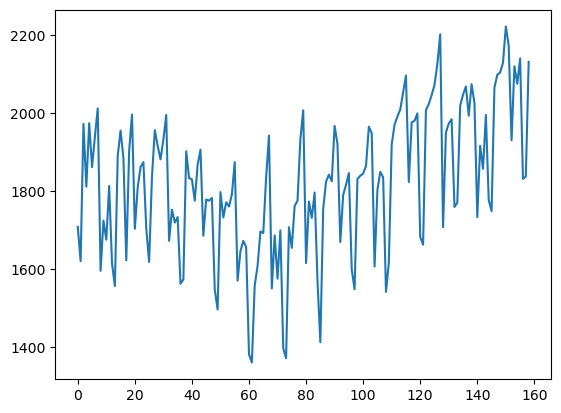

In [59]:
#Now Let us check the visuals of the footfall
walmart1.Footfalls.plot()

In [60]:
#You will get exponentoal trend with first decending and the  increasing
#we have to forcast footfalls in next 12 months,hence horizon=12,even
#season=12,so validating data will be 12 and tranding will 159-12=147
Train=walmart1.head(148)
Test=walmart1.tail(12)

In [61]:
#Now let us apply linear regression
import statsmodels.formula.api as smf

# Linear model

In [64]:
linear_model=smf.ols("Footfalls~t",data=Train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_linear))**2))
rmse_linear
                            

205.296308072429

# Exponential model

In [66]:
Exp_model = smf.ols("log_footfalls~t", data=Train).fit()
pred_Exp = pd.Series(Exp_model.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.exp(pred_Exp))**2))
rmse_Exp   

212.37728688274146

# Quadratic Model

In [67]:

Quad = smf.ols("Footfalls~t+t_squared", data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[['t','t_squared']]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_Quad))**2))
rmse_Quad

137.7821613097925

# Additive seasonality

In [69]:
add_sea = smf.ols('Footfalls ~ Jan+Feb+Mar+Apr+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
add_sea.summary
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Footfalls']) - np.array(pred_add_sea))**2))
rmse_add_sea

262.77906696150797

# Multiplicative Seasonality Model

In [75]:
mul_sea = smf.ols('log_footfalls ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(Test))
rmse_mul_sea=np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(np.exp(pred_mul_sea)))**2))
rmse_mul_sea

266.8496296339311

# Additive Seasonality with quadratic trend

In [77]:
add_sea_quad = smf.ols('Footfalls~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Footfalls']) - np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

49.92839984049347

# Multiplicative Seasonality with Linear Model

In [78]:
mul_add_sea=smf.ols("log_footfalls~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov",data=Train).fit()
pred_mul_add_sea = pd.Series(mul_add_sea.predict(Test))
rmse_mul_add_sea=np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(np.exp(pred_mul_add_sea)))**2))
rmse_mul_add_sea

169.10424680002077

In [86]:
##Let us create a dataframe and add all these rmse_values
data={"Model":pd.Series(['rmse_linear','rmse_Exp','rmse_Quad','rmse_add_sea','rmse_mul_sea','rmse_add_sea_quad','rmse_mul_add_sea']),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_mul_add_sea])}
data

{'Model': 0          rmse_linear
 1             rmse_Exp
 2            rmse_Quad
 3         rmse_add_sea
 4         rmse_mul_sea
 5    rmse_add_sea_quad
 6     rmse_mul_add_sea
 dtype: object,
 'RMSE_Values': 0    205.296308
 1    212.377287
 2    137.782161
 3    262.779067
 4    169.104247
 dtype: float64}

In [84]:
#Now let us test the model with full data
predict_data=pd.read_excel("C:/Data Set/Predict_new.xlsx")
model_full = smf.ols('Footfalls~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_new = pd.Series(model_full.predict(predict_data))
pred_new

0     2211.322927
1     2251.497389
2     2218.013985
3     2330.447249
4     2383.380512
5     2058.147108
6     2205.580371
7     2203.430301
8     2255.363564
9     2027.114657
10    1997.949454
11    2306.861174
dtype: float64

In [87]:
predict_data["forecasted_Footfalls"]=pd.Series(pred_new)

In [88]:
pred_data

,Month,t,t_squared,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2004-04-01,160,25600,0,0,0,1,0,0,0,0,0,0,0,0
1,2004-05-01,161,25921,0,0,0,0,1,0,0,0,0,0,0,0
2,2004-06-01,162,26244,0,0,0,0,0,1,0,0,0,0,0,0
3,2004-07-01,163,26569,0,0,0,0,0,0,1,0,0,0,0,0
4,2004-08-01,164,26896,0,0,0,0,0,0,0,1,0,0,0,0
5,2004-09-01,165,27225,0,0,0,0,0,0,0,0,1,0,0,0
6,2004-10-01,166,27556,0,0,0,0,0,0,0,0,0,1,0,0
7,2004-11-01,167,27889,0,0,0,0,0,0,0,0,0,0,1,0
8,2004-12-01,168,28224,0,0,0,0,0,0,0,0,0,0,0,1
9,2005-01-01,169,28561,1,0,0,0,0,0,0,0,0,0,0,0
